# Descriptive Statistics Review

![img](./diamonds.jpg)

We will try to understand the characteristics of a diamond that are most likely to influence its price. In this part, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#your code here
diamonds = pd.read_csv('diamonds.csv')
diamonds.reset_index(drop=True, inplace=True)

In [51]:
#your code here
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [52]:
#your code here
#diamonds['price'].min()
#diamonds['price'].max()
#price ok = the min and the max values are correct

#diamonds['carat'].min()
#diamonds['carat'].max()
#carat ok = the min and the max values are correct

#diamonds['cut'].unique() #ok

#diamonds['color'].unique() #ok

#diamonds['clarity'].unique() #ok

#diamonds['x'].min() #not expect to get 0 for length
#diamonds['y'].min() #not expect to get 0 for witdh
#diamonds['z'].min() #not expect to get 0 for depth (not normal to have diamonds in 2D shape)
#maybe this '0.0' represent missing data

#diamonds['depth'].min() #to have depth, you have to have the x, y and z different from 0.0

In [53]:
#your code here
diamonds.shape

(53940, 11)

## 1. `Clarity` Column

The `clarity` column is confusing because we are not diamond experts. Let's modify this column with a new scale that is more understandable for us.

**Modify `clarity` column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [54]:
#your code here
def clarity_mod(x):
    clarity_names = ['I1','SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
    if x in clarity_names:
        return clarity_names.index(x)
diamonds['clarity'] = diamonds['clarity'].apply(clarity_mod)
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


## 2. `Color` Column

In [55]:
#your code here
color_names = sorted(list(diamonds['color'].unique()),reverse=True)
#print(color_names)
def color_mod(x):
    #color_names = sorted(list(diamonds['color'].unique()),reverse=True)
    if x in color_names:
        return color_names.index(x)
diamonds['color'] = diamonds['color'].apply(color_mod)
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75


## Check the type of columns

In [56]:
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  int64  
 4   clarity     53940 non-null  int64  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.5+ MB


### in both methods we have 11 columns and 53940 rows. The interesting fact that is no row with null information (missing data). We have only 1 column with object type.

### price should be float, not int

In [58]:
diamonds.describe()
#This output is very convenient for quickly checking for strange values in the numerical variables; for instance, given the definitions of all of them, we would not expect to find negative values, and indeed, based on the minima (min row) all values are non-negative, which is good.

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### The columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns.

In [59]:
#your code here
condx = diamonds['x'] == 0.0
condy = diamonds['y'] == 0.0
condz = diamonds['z'] == 0.0

diamonds_missing_all = diamonds[(condx & condy & condz)]
diamonds_missing_all.shape
#we have 7 rows without information for length, width and depth

diamonds_missing = diamonds[(condx | condy | condz)]
diamonds_missing.shape
#for one of them with 0.0 we have 20 rows

(20, 11)

We have 20 rows that have a value of 0 in some or all the afore mentioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z.

In [60]:
#your code here
# depth% = 2 * z / (x + y)
def calculate_z(row):
    #data = [x,y]
    #return depth*(statistics.mean(data)
    if row['z'] == 0:
        return row['depth']*(row['x']+row['y'])/200
    else:
        return row

**Apply it just to the rows with incorrect values**

In [61]:
#your code here
diamonds[diamonds['z'] == 0.0].apply(calculate_z,axis=1)
#diamonds.loc[diamonds['x']==0].apply(calculate_z,axis=1)
#diamonds[diamonds['z'] == 0.0].apply(calculate_z,axis=1)
#diamonds['z'] = diamonds[diamonds['z'] == 0.0].apply(calculate_z,axis=1) #dessa forma devolve NaN pros valores diferentes de 0.0
#diamonds['z'] = diamonds['z'].apply(lambda x: calculate_z if x==0.0 else x) #dessa forma não calcula calculate_z

#diamonds[(condz)]
#como substituir se apply não aceita inplace???
#diamonds[diamonds['z'] == 0.0]

2207     3.850365
2314     3.852030
4791     4.085550
5471     3.839120
10167    4.540800
11182    2.038960
11963    0.000000
13601    4.058160
15951    0.000000
24394    5.031180
24520    0.000000
26123    5.192110
26243    0.000000
27112    5.137740
27429    0.000000
27503    5.006595
27739    5.662250
49556    0.000000
49557    0.000000
51506    4.040760
dtype: float64

### The other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

In [62]:
#your code here
diamonds['z'].replace(0.0, np.nan,inplace=True)

Let's check the data again with the `describe()` method.

In [63]:
#your code here
diamonds.describe()
#column z not appear because of the NaN values

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53920.000000
mean,26970.500000,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.540046
std,15571.281097,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.702530
min,1.000000,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000
25%,13485.750000,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. 

In [64]:
#your code here
diamonds['z'].isna().sum() #check if it works
diamonds.dropna(inplace=True)
diamonds.shape

(53920, 11)

In [66]:
#your code here
diamonds.describe

<bound method NDFrame.describe of        Unnamed: 0  carat        cut  color  clarity  depth  table  price  \
0               1   0.23      Ideal      5        1   61.5   55.0    326   
1               2   0.21    Premium      5        2   59.8   61.0    326   
2               3   0.23       Good      5        4   56.9   65.0    327   
3               4   0.29    Premium      1        3   62.4   58.0    334   
4               5   0.31       Good      0        1   63.3   58.0    335   
...           ...    ...        ...    ...      ...    ...    ...    ...   
53935       53936   0.72      Ideal      6        2   60.8   57.0   2757   
53936       53937   0.72       Good      6        2   63.1   55.0   2757   
53937       53938   0.70  Very Good      6        2   62.8   60.0   2757   
53938       53939   0.86    Premium      2        1   61.0   58.0   2757   
53939       53940   0.75      Ideal      6        1   62.2   55.0   2757   

          x     y     z  
0      3.95  3.98  2.43  
1

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

In [68]:
#your code here
q3 = np.quantile(diamonds['price'], 0.75)
diamonds[diamonds['price']>q3]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
12760,12761,1.21,Premium,2,1,62.7,59.0,5324,6.75,6.78,4.24
12761,12762,1.21,Very Good,2,1,62.6,61.0,5324,6.70,6.75,4.21
12762,12763,1.21,Very Good,1,2,62.1,56.0,5324,6.76,6.92,4.25
12763,12764,1.21,Ideal,0,4,62.3,55.0,5324,6.81,6.86,4.26
12764,12765,0.90,Very Good,4,4,61.2,56.0,5324,6.18,6.23,3.80
...,...,...,...,...,...,...,...,...,...,...,...
27745,27746,2.00,Very Good,2,2,62.8,57.0,18803,7.95,8.00,5.01
27746,27747,2.07,Ideal,3,1,62.5,55.0,18804,8.20,8.13,5.11
27747,27748,1.51,Ideal,3,7,61.7,55.0,18806,7.37,7.41,4.56
27748,27749,2.00,Very Good,3,2,63.5,56.0,18818,7.90,7.97,5.04


Our dataset is really big and the outliers are really far apart from the rest of the values.

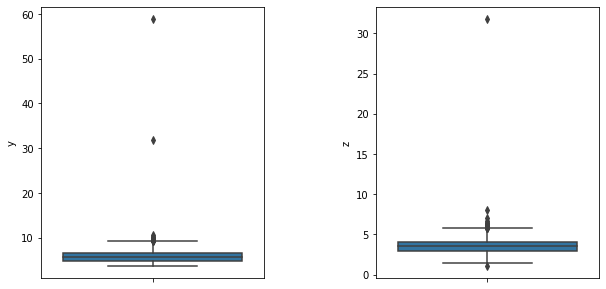

In [69]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

We have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values for z higher than 10 in it.

In [70]:
#your code here
diamonds[diamonds['z']>10]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
48410,48411,0.51,Very Good,5,4,61.8,54.7,1970,5.12,5.15,31.8


In [71]:
#your code here
diamonds['z'].loc[48410]=0
diamonds['z'].loc[48410] = calculate_z(diamonds.loc[48410])

Let's check if we actually corrected the outlier.

In [72]:
diamonds.loc[48410]

Unnamed: 0        48411
carat              0.51
cut           Very Good
color                 5
clarity               4
depth              61.8
table              54.7
price              1970
x                  5.12
y                  5.15
z               3.17343
Name: 48410, dtype: object

In [73]:
#your code here
diamonds[diamonds['y']>10]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
24067,24068,2.00,Premium,2,1,58.9,57.0,12210,8.09,58.90,8.06
25998,25999,4.01,Premium,1,0,61.0,61.0,15223,10.14,10.10,6.17
27415,27416,5.01,Fair,0,0,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,0,0,65.8,58.0,18531,10.23,10.16,6.72
49189,49190,0.51,Ideal,5,4,61.8,55.0,2075,5.15,31.80,5.12


In [79]:
#your code here
# depth% = 2 * z / (x + y)
def calculate_y(row):
    #data = [x,y]
    #return depth*(statistics.mean(data)
    if row['y'] == 0:
        return (200*row['z']/row['depth'])-row['x']
    else:
        return row

diamonds['y'].loc[24067]=0
diamonds['y'].loc[25998]=0
diamonds['y'].loc[27415]=0
diamonds['y'].loc[27630]=0
diamonds['y'].loc[49189]=0

diamonds['y'].loc[24067] = calculate_y(diamonds.loc[24067])
diamonds['y'].loc[25998] = calculate_y(diamonds.loc[25998])
diamonds['y'].loc[27415] = calculate_y(diamonds.loc[27415])
diamonds['y'].loc[27630] = calculate_y(diamonds.loc[27630])
diamonds['y'].loc[49189] = calculate_y(diamonds.loc[49189])

In [87]:
#your thoughts here
diamonds[diamonds['y']>10] 
#the rolls still have y>10 value but now it's not so higher than 10

#Let's check if y=19 is an outlier:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

diamonds_outliers = (diamonds < (Q1 - 1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))
diamonds_outliers[diamonds_outliers==True]

Unnamed: 0    26969.50
carat             0.64
color             3.00
clarity           2.00
depth             1.50
table             3.00
price          4374.25
x                 1.83
y                 1.82
z                 1.13
dtype: float64


,Unnamed: 0,carat,clarity,color,cut,depth,price,table,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


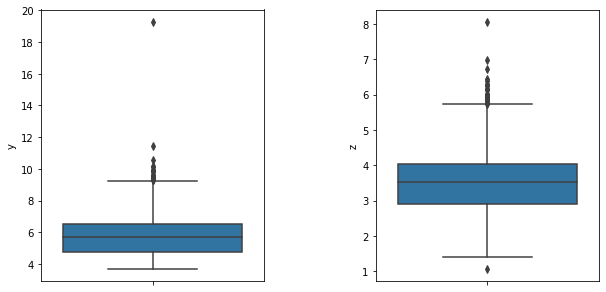

In [80]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

### We still have an outlier in y = 19

In [88]:
diamonds.to_csv('diamonds_clean.csv') 

In [65]:
"""Export data cleaned to make a dashboard in Tableau"""
diamonds.to_excel('diamonds_cleaned.xlsx')